In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as u
import numpy as np
import importlib
from tqdm.notebook import tqdm

importlib.reload(u)
plt.rcParams['figure.figsize'] = [12, 5]

In [3]:
df = pd.read_csv('train.csv')
df

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0      3180602.69   
1               1        0                  0       166603.91   
2               2        0                  0       302879.87   
3               3        0                  0     11917682.27   
4               4        0                  0       447549.96   
...           ...      ...                ...             ...   
5237975       195      480                540      2440722.89   
5237976       196      480                540       349510.47   
5237977       197      480                540            0.00   
5237978       198      480                540      1000898.84   
5237979       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                              1         0.999812   13380276.64        NaN   
1                             -1         0.999896    1642214.25        NaN   
2                             -1         0.999561    1819368.03        NaN   
3                             -1         1.000171   18389745.62        NaN   
4                             -1         0.999532   17860614.95        NaN   
...                          ...              ...           ...        ...   
5237975                       -1         1.000317   28280361.74   0.999734   
5237976                       -1         1.000643    9187699.11   1.000129   
5237977                        0         0.995789   12725436.10   0.995789   
5237978                        1         0.999210   94773271.05   0.999210   
5237979                       -1         1.002129   24073677.32   1.000859   

         near_price  bid_price   bid_size  ask_price   ask_size       wap  \
0               NaN   0.999812   60651.50   1.000026    8493.03  1.000000   
1               NaN   0.999896    3233.04   1.000660   20605.09  1.000000   
2               NaN   0.999403   37956.00   1.000298   18995.00  1.000000   
3               NaN   0.999999    2324.90   1.000214  479032.40  1.000000   
4               NaN   0.999394   16485.54   1.000016     434.10  1.000000   
...             ...        ...        ...        ...        ...       ...   
5237975    0.999734   1.000317   32257.04   1.000434  319862.40  1.000328   
5237976    1.000386   1.000643  205108.40   1.000900   93393.07  1.000819   
5237977    0.995789   0.995789   16790.66   0.995883  180038.32  0.995797   
5237978    0.999210   0.998970  125631.72   0.999210  669893.00  0.999008   
5237979    1.001494   1.002129  250081.44   1.002447  300167.56  1.002274   

           target  time_id       row_id  
0       -3.029704        0        0_0_0  
1       -5.519986        0        0_0_1  
2       -8.389950        0        0_0_2  
3       -4.010200        0        0_0_3  
4       -7.349849        0        0_0_4  
...           ...      ...          ...  
5237975  2.310276    26454  480_540_195  
5237976 -8.220077    26454  480_540_196  
5237977  1.169443    26454  480_540_197  
5237978 -1.540184    26454  480_540_198  
5237979 -6.530285    26454  480_540_199  

[5237980 rows x 17 columns]

In [4]:
df.head()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 -5.519986   
2         NaN   0.999403  37956.00   1.000298   18995.00  1.0 -8.389950   
3         NaN   0.999999   2324.90   1.000214  479032.40  1.0 -4.010200   
4         NaN   0.999394  16485.54   1.000016     434.10  1.0 -7.349849   

   time_id row_id  
0        0  0_0_0  
1        0  0_0_1  
2        0  0_0_2  
3        0  0_0_3  
4        0  0_0_4

In [5]:
print(f"stock count: {len(df['stock_id'].unique())}")
print(f"date count: {len(df['date_id'].unique())}")

stock count: 200
date count: 481


# Visualisations

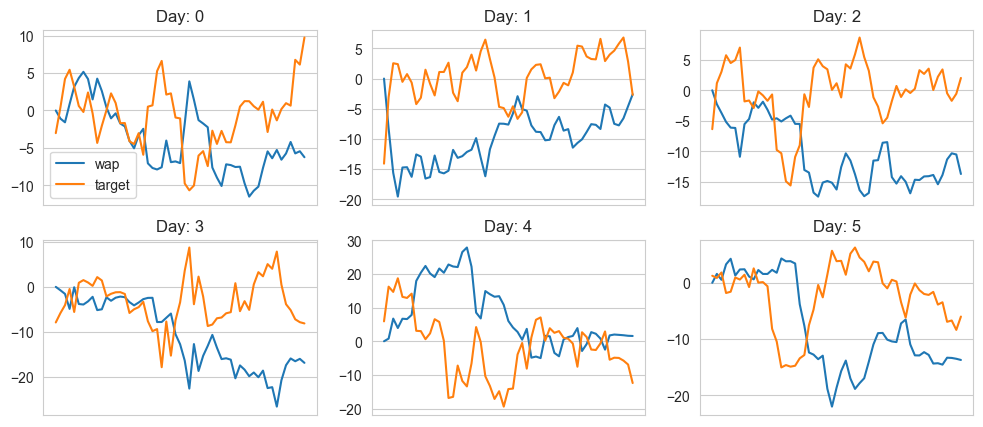

In [6]:
from typing import Tuple, Optional

df_viz = df.copy()
df_viz['wap'] = (df_viz['wap'] - 1) * 10_000
df_viz['target'] = df_viz['target']
# price_cols = ['wap', 'bid_price', 'ask_price']
# for pc in price_cols:
#     df_viz[pc] = (df_viz[pc] - 1) * 10_000
u.plot_timeseries_df(2, 3, df_viz, 0, [('wap', None), ('target', None)])

# Does every day contain every stock?
And does every day have exactly 55 time entries for every stock?

In [9]:
# Does every stock exist in every time bucket - no :(
df[['stock_id', 'date_id', 'seconds_in_bucket']].groupby(by=['date_id', 'seconds_in_bucket']).size().min()

191

In [10]:
# Does every stock have 55 time entries, yes
df[['stock_id', 'date_id', 'seconds_in_bucket']].groupby(by=['stock_id', 'date_id']).size().min()

55

# Missing values

In [11]:
# source: https://www.kaggle.com/code/a27182818/explain-the-data-lightgbm-baseline
def inspect_columns(df):
    # A helper function that does a better job than df.info() and df.describe()
    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result


inspect_columns(df)

unique  cardinality  with_null  null_pct  \
stock_id                  False          200      False      0.00   
date_id                   False          481      False      0.00   
seconds_in_bucket         False           55      False      0.00   
imbalance_size            False      2971863       True      0.00   
imbalance_buy_sell_flag   False            3      False      0.00   
reference_price           False        28741       True      0.00   
matched_size              False      2948862       True      0.00   
far_price                 False        95739       True     55.26   
near_price                False        84625       True     54.55   
bid_price                 False        28313       True      0.00   
bid_size                  False      2591773      False      0.00   
ask_price                 False        28266       True      0.00   
ask_size                  False      2623254      False      0.00   
wap                       False        31506       True      0.00   
target                    False        15934       True      0.00   
time_id                   False        26455      False      0.00   
row_id                     True      5237980      False      0.00   

                             1st_row   random_row     last_row    dtype  
stock_id                           0          139          199    int64  
date_id                            0          247          480    int64  
seconds_in_bucket                  0          450          540    int64  
imbalance_size            3180602.69          0.0   1884285.71  float64  
imbalance_buy_sell_flag            1            0           -1    int64  
reference_price             0.999812     0.999212     1.002129  float64  
matched_size             13380276.64   12835778.0  24073677.32  float64  
far_price                        NaN     0.999212     1.000859  float64  
near_price                       NaN     0.999212     1.001494  float64  
bid_price                   0.999812     0.999212     1.002129  float64  
bid_size                     60651.5       727.09    250081.44  float64  
ask_price                   1.000026     0.999308     1.002447  float64  
ask_size                     8493.03       1558.2    300167.56  float64  
wap                              1.0     0.999242     1.002274  float64  
target                     -3.029704     -1.87993    -6.530285  float64  
time_id                            0        13630        26454    int64  
row_id                         0_0_0  247_450_139  480_540_199   object

## Target is null

In [12]:
df[pd.isna(df['target'])]

stock_id  date_id  seconds_in_bucket  imbalance_size  \
369508        131       35                  0             NaN   
369700        131       35                 10             NaN   
369892        131       35                 20             NaN   
370084        131       35                 30             NaN   
370276        131       35                 40             NaN   
...           ...      ...                ...             ...   
4225338       158      388                510             NaN   
4225538       158      388                520             NaN   
4225738       158      388                530             NaN   
4225938       158      388                540             NaN   
4764999        19      438                  0             NaN   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
369508                         0              NaN           NaN        NaN   
369700                         0              NaN           NaN        NaN   
369892                         0              NaN           NaN        NaN   
370084                         0              NaN           NaN        NaN   
370276                         0              NaN           NaN        NaN   
...                          ...              ...           ...        ...   
4225338                        0              NaN           NaN        NaN   
4225538                        0              NaN           NaN        NaN   
4225738                        0              NaN           NaN        NaN   
4225938                        0              NaN           NaN        NaN   
4764999                       -1              NaN           NaN        NaN   

         near_price  bid_price  bid_size  ask_price  ask_size  wap  target  \
369508          NaN        NaN       0.0        NaN       0.0  NaN     NaN   
369700          NaN        NaN       0.0        NaN       0.0  NaN     NaN   
369892          NaN        NaN       0.0        NaN       0.0  NaN     NaN   
370084          NaN        NaN       0.0        NaN       0.0  NaN     NaN   
370276          NaN        NaN       0.0        NaN       0.0  NaN     NaN   
...             ...        ...       ...        ...       ...  ...     ...   
4225338         NaN        NaN       0.0        NaN       0.0  NaN     NaN   
4225538         NaN        NaN       0.0        NaN       0.0  NaN     NaN   
4225738         NaN        NaN       0.0        NaN       0.0  NaN     NaN   
4225938         NaN        NaN       0.0        NaN       0.0  NaN     NaN   
4764999         NaN        NaN       0.0        NaN       0.0  NaN     NaN   

         time_id       row_id  
369508      1925     35_0_131  
369700      1926    35_10_131  
369892      1927    35_20_131  
370084      1928    35_30_131  
370276      1929    35_40_131  
...          ...          ...  
4225338    21391  388_510_158  
4225538    21392  388_520_158  
4225738    21393  388_530_158  
4225938    21394  388_540_158  
4764999    24090     438_0_19  

[88 rows x 17 columns]

In [13]:
df[pd.isna(df['target'])][['stock_id', 'date_id', 'target']].groupby(by=['stock_id', 'date_id']).size()

stock_id  date_id
19        438         1
101       328         1
131       35         31
158       388        55
dtype: int64

Stock 158 on day 388 is missing all values, 131 is missing most of them. 19 and 101 are only missing the first day.
Let's drop (131, 35) and (158, 388) and set value of 19 and 438 to 0

In [14]:
# Dropped in preprocess
df.drop(df[(df['stock_id'] == 131) & (df['date_id'] == 35)].index, inplace=True)
df.drop(df[(df['stock_id'] == 158) & (df['date_id'] == 388)].index, inplace=True)
df['target'] = df['target'].fillna(0)

# Target distribution

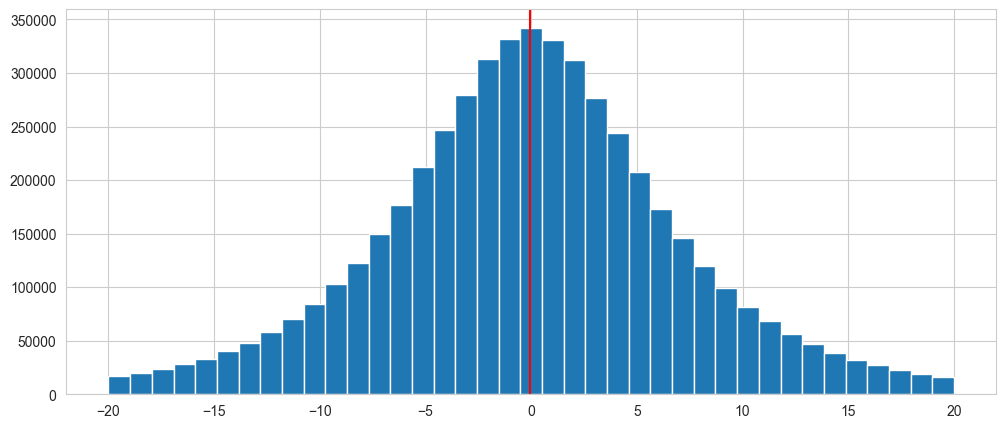

In [15]:
ax = df['target'].hist(bins=np.linspace(-20, 20, 40))
ax.axvline(x=df['target'].mean(), color='red', label='Expected value')

## Correlations:

<Axes: >

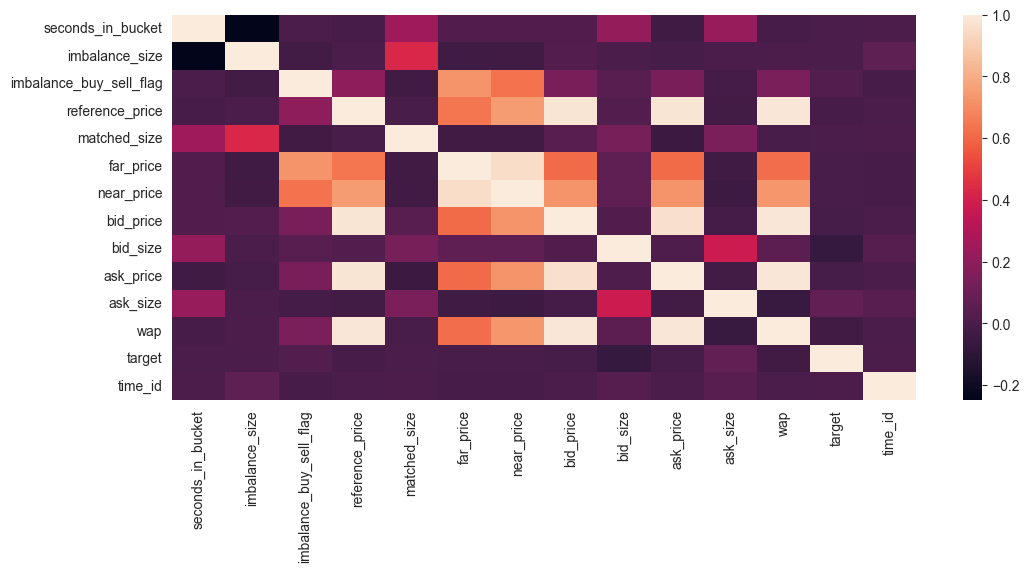

In [17]:
sns.heatmap(df.drop(columns=['stock_id', 'date_id']).corr(method='spearman'))

## Looking at each stock individually
Inspecting first 20
The variance of every stock varies a lot

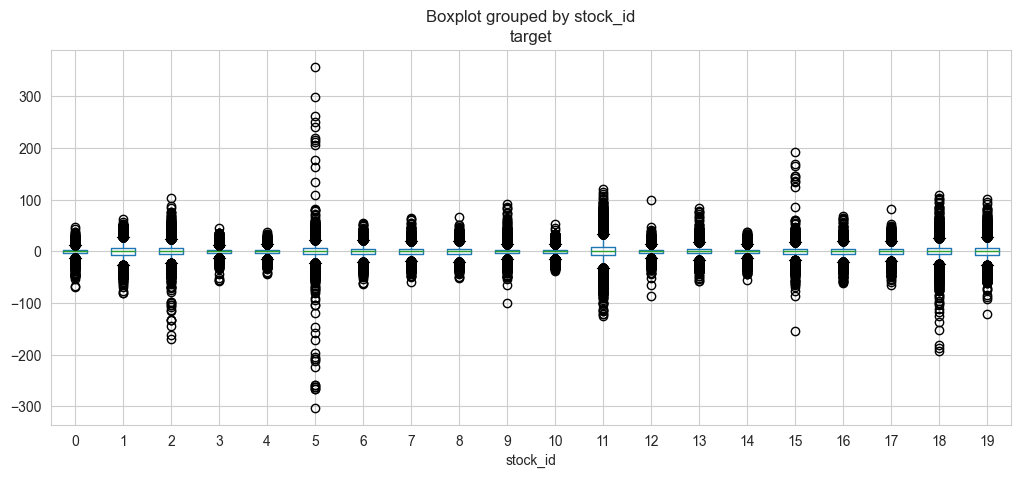

In [16]:
ax = df[df['stock_id'] < 20].boxplot(column='target', by='stock_id')